In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# 读取数据
data = np.loadtxt('data2.txt', delimiter=',')
X = data[:, :-1]  # 特征
y = data[:, -1]   # 目标值
display(X, y)

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

Text(0, 0.5, 'Exam 2 Score')

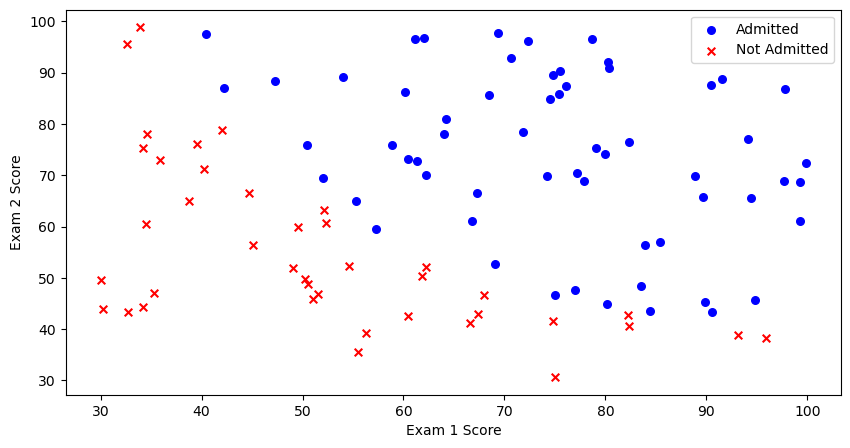

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
pdData = pd.read_csv('data2.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
positive = pdData[pdData['Admitted'] == 1]
negative = pdData[pdData['Admitted'] == 0] 

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')


In [5]:
#归一化处理
def normalize_data(data_train, data_test):
    data_norm = data_train.copy()
    maximum = np.max(data_norm, axis=0, keepdims=True)
    minimun = np.min(data_norm, axis=0, keepdims=True)
    data_train = (data_train - minimun)/(maximum - minimun)
    data_test = (data_test-minimun)/(maximum-minimun)
    return data_train, data_test

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val = normalize_data(X_train, X_val)

X_train = np.concatenate((X_train, np.ones((X_train.shape[0],1))), axis=1)
X_val = np.concatenate((X_val, np.ones((X_val.shape[0],1))), axis=1)

"""
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_val)
proba_ = model.predict_proba(X_val)
display('预测值类别是：',y_pred[:20])
display('预测值概率是：', proba_[:20])
coef = model.coef_
intercept = model.intercept_
print(coef, intercept)
"""
X_val

array([[0.38956944, 0.42350432, 1.        ],
       [0.06400678, 0.43642522, 1.        ],
       [0.03818328, 0.18609378, 1.        ],
       [0.4610047 , 0.31432447, 1.        ],
       [0.30083445, 0.2229426 , 1.        ],
       [0.05912103, 0.65382979, 1.        ],
       [0.29348214, 0.26737325, 1.        ],
       [0.84357013, 0.57423061, 1.        ],
       [0.94315096, 0.11165142, 1.        ],
       [0.06542784, 0.69465488, 1.        ],
       [0.58195856, 0.91295399, 1.        ],
       [0.44891644, 0.61823627, 1.        ],
       [0.43570996, 0.62244203, 1.        ],
       [0.31513382, 0.56879704, 1.        ],
       [0.91782133, 0.68197528, 1.        ],
       [0.7019434 , 0.65539214, 1.        ],
       [0.24660577, 0.84774933, 1.        ],
       [0.29238382, 0.66221079, 1.        ],
       [0.74887421, 0.67205614, 1.        ],
       [0.7932702 , 0.38743524, 1.        ],
       [0.27989286, 0.42782079, 1.        ],
       [0.69624872, 0.96745081, 1.        ],
       [0.

In [6]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(penalty='l2')
model1.fit(X_train,y_train)
y_pred = model1.predict(X_val)
proba_ = model1.predict_proba(X_val)
display('预测值类别是：',y_pred[:20])
display('预测值概率是：', proba_[:20])
model1.coef_

'预测值类别是：'

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1.])

'预测值概率是：'

array([[0.57124664, 0.42875336],
       [0.76262164, 0.23737836],
       [0.86155842, 0.13844158],
       [0.58516483, 0.41483517],
       [0.73243059, 0.26756941],
       [0.6613414 , 0.3386586 ],
       [0.71565705, 0.28434295],
       [0.20792572, 0.79207428],
       [0.37106076, 0.62893924],
       [0.63543104, 0.36456896],
       [0.19738856, 0.80261144],
       [0.41648979, 0.58351021],
       [0.42307624, 0.57692376],
       [0.53824863, 0.46175137],
       [0.1420165 , 0.8579835 ],
       [0.24373519, 0.75626481],
       [0.42278799, 0.57721201],
       [0.49928657, 0.50071343],
       [0.21369819, 0.78630181],
       [0.31923025, 0.68076975]])

array([[ 2.79690202e+00,  2.35272859e+00, -1.00090124e-05]])

In [7]:
# 定义逻辑回归函数
def sigmoid(z):
    fs = []
    for i in z:
        fs.append(1 / (1 + np.exp(-i)))
    return fs
num_feature = data.shape[1] - 1

In [10]:
# model init
w = np.random.rand(num_feature+1,1)

# gradient descent
def L2_loss(y_pred,y):
    return np.mean(np.square(y_pred-y))

iterations = 100000
lr = 0.001
a = np.ones((1,1))
np.matmul(X_val, w)

array([[0.91529632],
       [0.66631992],
       [0.62134144],
       [0.95925265],
       [0.82695082],
       [0.68438592],
       [0.8257585 ],
       [1.27943428],
       [1.30955498],
       [0.69333202],
       [1.11232197],
       [0.98046491],
       [0.97073469],
       [0.8726583 ],
       [1.34732904],
       [1.17870658],
       [0.84797768],
       [0.86454581],
       [1.21645685],
       [1.22201719],
       [0.83141671],
       [1.20565158],
       [1.1465809 ],
       [1.33413334],
       [1.02223095],
       [0.92295102],
       [1.20437237],
       [0.79084022],
       [1.19143371],
       [1.13574054]])

In [14]:
log_normol = []
test_log_normol = []
for i in range(iterations):
    h = np.matmul(X_train, w)
    y_pred = np.array(sigmoid(h))
    term = lr*np.mean((y_pred-y_train.reshape(-1,1))*X_train, axis=0).reshape(-1,1) 
    w -= term
    y_test_pred = np.array(sigmoid(np.matmul(X_val, w)))
    loss = L2_loss(y_pred.reshape(-1,1),y_train.reshape(-1,1))
    test_loss = L2_loss(y_test_pred.reshape(-1,1),y_val.reshape(-1,1))
    if i % 1000 == 0:
        print('iter:{},loss:{}'.format(i,loss))
        log_normol.append([i,loss])
        test_log_normol.append([i,test_loss])


iter:0,loss:0.25088233434818263
iter:1000,loss:0.23886837015907045
iter:2000,loss:0.23056253012814212
iter:3000,loss:0.22452552150412233
iter:4000,loss:0.21979996224551712
iter:5000,loss:0.21582235324433138
iter:6000,loss:0.21228162125637665
iter:7000,loss:0.20901116542898407
iter:8000,loss:0.20592239588629527
iter:9000,loss:0.2029676421568067
iter:10000,loss:0.20012047198527813
iter:11000,loss:0.19736551277702627
iter:12000,loss:0.19469324025098253
iter:13000,loss:0.19209730563602193
iter:14000,loss:0.1895731479924131
iter:15000,loss:0.1871172575433659
iter:16000,loss:0.1847267721013015
iter:17000,loss:0.18239924728082868
iter:18000,loss:0.18013252005794583
iter:19000,loss:0.1779246243894569
iter:20000,loss:0.17577373714849895
iter:21000,loss:0.17367814251274788
iter:22000,loss:0.1716362080481159
iter:23000,loss:0.169646368454483
iter:24000,loss:0.1677071144535402
iter:25000,loss:0.16581698518073315
iter:26000,loss:0.1639745629829844
iter:27000,loss:0.16217846986943935
iter:28000,loss

In [15]:
w 

array([[ 3.65683068],
       [ 2.88695332],
       [-2.95397637]])

In [25]:
w = np.random.rand(num_feature+1,1)
lamda = [0.1, 0.2, 0.3]
lam = 0.01
log_l2 = []
test_log_l2 = []
for i in range(iterations):
    h = np.matmul(X_train, w)
    y_pred = np.array(sigmoid(h))
    term = lr*(np.mean((y_pred-y_train.reshape(-1,1))*X_train, axis=0).reshape(-1,1) + (2 * lam * w).reshape(-1,1)) 
    w -= term
    y_test_pred = np.array(sigmoid(np.matmul(X_val, w)))
    loss = L2_loss(y_pred.reshape(-1,1),y_train.reshape(-1,1))
    test_loss = L2_loss(y_test_pred.reshape(-1,1),y_val.reshape(-1,1))
    if i % 1000 == 0:
        print('iter:{},loss:{}, lambda:{}'.format(i,loss, lam))
        log_l2.append([i,loss])
        test_log_l2.append([i,test_loss])

iter:0,loss:0.26262891959669804, lambda:0.01
iter:1000,loss:0.24423319926340303, lambda:0.01
iter:2000,loss:0.23223888671876222, lambda:0.01
iter:3000,loss:0.22444110152449398, lambda:0.01
iter:4000,loss:0.2190873202676028, lambda:0.01
iter:5000,loss:0.2150834872092786, lambda:0.01
iter:6000,loss:0.21182332904780377, lambda:0.01
iter:7000,loss:0.2089902907074465, lambda:0.01
iter:8000,loss:0.2064229790857992, lambda:0.01
iter:9000,loss:0.2040388665281942, lambda:0.01
iter:10000,loss:0.2017945395255542, lambda:0.01
iter:11000,loss:0.19966586579800688, lambda:0.01
iter:12000,loss:0.19763830767749813, lambda:0.01
iter:13000,loss:0.19570222418999933, lambda:0.01
iter:14000,loss:0.19385058230246335, lambda:0.01
iter:15000,loss:0.19207782406245416, lambda:0.01
iter:16000,loss:0.19037928990688244, lambda:0.01
iter:17000,loss:0.18875091285130538, lambda:0.01
iter:18000,loss:0.18718904759820873, lambda:0.01
iter:19000,loss:0.1856903691311169, lambda:0.01
iter:20000,loss:0.18425180870433422, lam

In [17]:
def compute_cost(X, y, theta, lambd=0):
    m = len(y)
    h = sigmoid(X.dot(theta))
    term1 = -y.dot(np.log(h))
    term2 = -(1 - y).dot(np.log(1 - h))
    reg_term = (lambd / (2 * m)) * np.sum(theta[1:]**2)
    cost = (1 / m) * (term1 + term2) + reg_term
    return cost



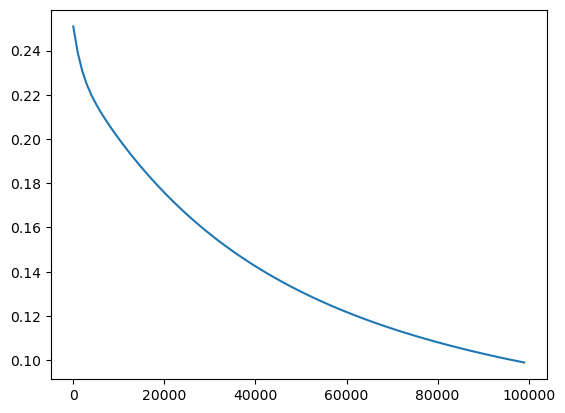

In [18]:

# loss curve visualization
log_normol = np.array(log_normol)
plt.plot(log_normol[:,0],log_normol[:,1])


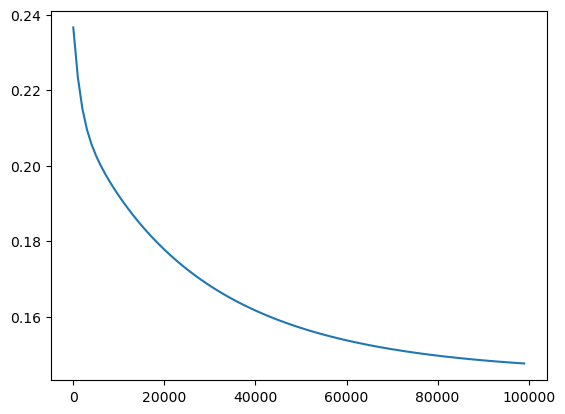

In [19]:

# loss curve visualization
log_l2 = np.array(log_l2)
plt.plot(log_l2[:,0],log_l2[:,1])


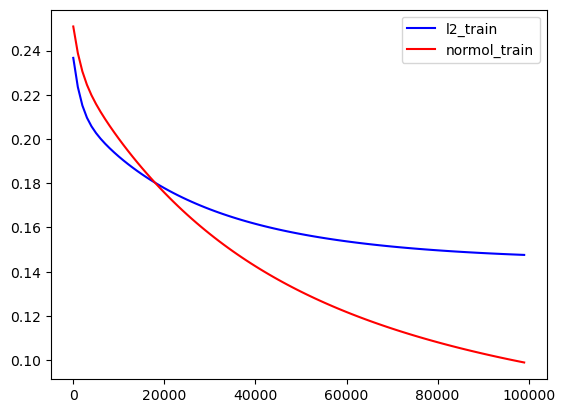

In [20]:
plt.plot(log_l2[:,0],log_l2[:,1],color = 'b',label = 'l2_train')
plt.plot(log_normol[:,0],log_normol[:,1],color = 'r',label = 'normol_train')
plt.legend()

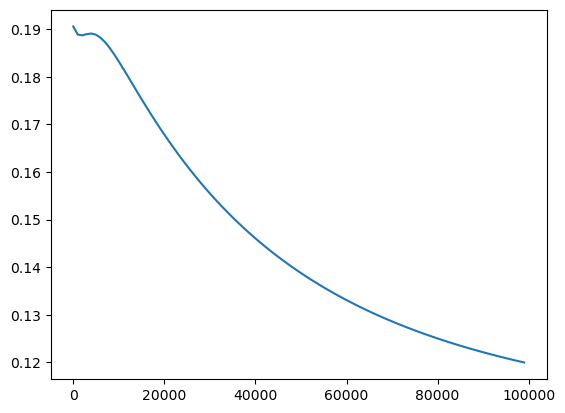

In [22]:
# loss curve visualization
test_log_normol = np.array(test_log_normol)
plt.plot(test_log_normol[:,0],test_log_normol[:,1])

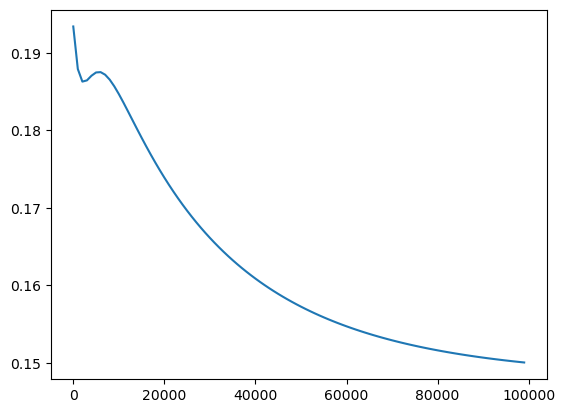

In [26]:
# loss curve visualization
test_log_l2 = np.array(test_log_l2)
plt.plot(test_log_l2[:,0],test_log_l2[:,1])

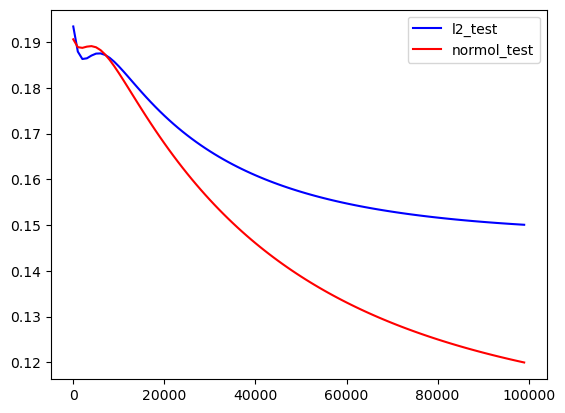

In [28]:
plt.plot(test_log_l2[:,0],test_log_l2[:,1],color = 'b',label = 'l2_test')
plt.plot(test_log_normol[:,0],test_log_normol[:,1],color = 'r',label = 'normol_test')
plt.legend()

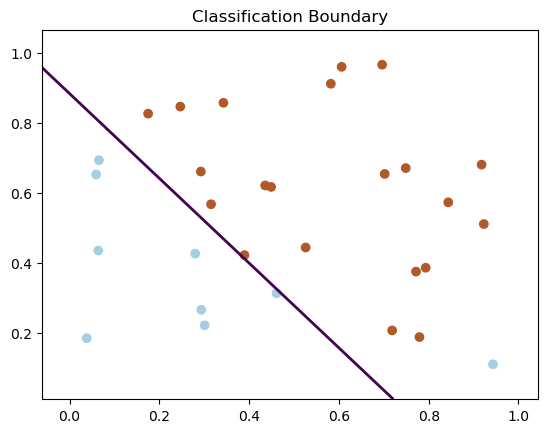

In [56]:
# 可视化分类直线
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=plt.cm.Paired)
x_min, x_max = X_val[:, 0].min() - 0.1, X_val[:, 0].max() + 0.1
y_min, y_max = X_val[:, 1].min() - 0.1, X_val[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.matmul(np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape[0])], w)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidths=2)
plt.title('Classification Boundary')
plt.show()


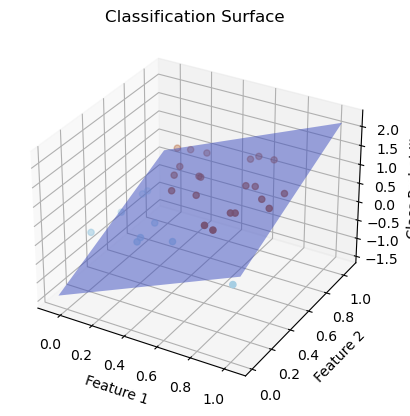

In [57]:
# 可视化分类曲面
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_val[:, 0], X_val[:, 1], y_val, c=y_val, cmap=plt.cm.Paired)

x_min, x_max = X_val[:, 0].min() - 0.1, X_val[:, 0].max() + 0.1
y_min, y_max = X_val[:, 1].min() - 0.1, X_val[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.matmul(np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape[0])], w)
Z = Z.reshape(xx.shape)

ax.plot_surface(xx, yy, Z, alpha=0.5, rstride=100, cstride=100, cmap=plt.cm.coolwarm)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Class Probability')
plt.title('Classification Surface')
plt.show()


In [ ]:
"""
def gradient_descent(X, y, theta, alpha, iterations, lambd=0):
    m = len(y)
    history = []
    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1 / m) * X.T.dot(h - y)
        reg_term = (lambd / m) * theta
        reg_term[0] = 0  # 不对偏置项应用正则化
        gradient += reg_term
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta, lambd)
        history.append(cost)
    return theta, history

# 一般梯度下降
alpha = 0.1
iterations = 5000
theta_general, cost_history_general = gradient_descent(X_train, y_train, np.zeros(X_train.shape[1]), alpha, iterations)

# L2正则化梯度下降
alpha_reg = 0.1
iterations_reg = 5000
lambd_reg = 0.1  # 正则化参数
theta_reg, cost_history_reg = gradient_descent(X_train, y_train, np.zeros(X_train.shape[1]), alpha_reg, iterations_reg, lambd_reg)

# 可视化损失曲线
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(iterations), cost_history_general, label='General Gradient Descent')
plt.plot(range(iterations_reg), cost_history_reg, label='L2 Regularized Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('Loss Curve')

# 可视化分类直线
plt.subplot(1, 2, 2)
plt.scatter(X_val[:, 0], X_val[:, 1],c=y_val)
x_values = np.array([min(X[:, 0]), max(X[:, 0])])
y_values = -(intercept + coef[0, 0] * x_values) / coef[0, 1]
#plt.plot(x_values, y_values, color='red')


#y_values_general = -(theta_general[0] + np.dot(theta_general[1], x_values)) / theta_general[2]
#y_values_general = x_values * coef[0][0] + x_values * coef[0][1] + intercept 
#y_values_reg = -(theta_reg[0] + np.dot(theta_reg[1], x_values)) / theta_reg[2]

#plt.plot(x_values, y_values_general, label='General Gradient Descent')
#plt.plot(x_values, y_values_reg, label='L2 Regularized Gradient Descent')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Classification Boundary')

plt.show()
theta_general
"""

In [ ]:
"""
# 散点图
ax.scatter(X_val[:, 0], X_val[:, 1], y_val, c=y_val, cmap=plt.get_cmap('viridis'))

# 构建分类直线
x_values = np.linspace(min(X_val[:, 0]) - 1, max(X_val[:, 0]) + 1, 50)
y_values = np.linspace(min(X_val[:, 1]) - 1, max(X_val[:, 1]) + 1, 50)
X_mesh, Y_mesh = np.meshgrid(x_values, y_values)
Z = np.zeros(X_mesh.shape)
"""

In [ ]:
"""
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 散点图
ax.scatter(X_val[:, 1], X_val[:, 2], y_val, c=y_val, cmap=plt.get_cmap('viridis'))

# 构建分类直线
x_values = np.linspace(min(X_val[:, 1]) - 1, max(X_val[:, 1]) + 1, 50)
y_values = np.linspace(min(X_val[:, 2]) - 1, max(X_val[:, 2]) + 1, 50)
X_mesh, Y_mesh = np.meshgrid(x_values, y_values)
Z = np.zeros(X_mesh.shape)

for i in range(X_mesh.shape[0]):
    for j in range(X_mesh.shape[1]):
        features = np.array([1, X_mesh[i, j], Y_mesh[i, j]])
        Z[i, j] = sigmoid(features.dot(theta_reg))

ax.plot_surface(X_mesh, Y_mesh, Z, alpha=0.8, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Predicted Probability')

plt.title('Classification Boundary and Data Points')
plt.show()
"""